In [3]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, LineString
import pandas as pd
import networkx as nx
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium
from folium.plugins import HeatMap
import mapclassify

In [4]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    cable_gps = pd.read_sql('select cable_id,geometry from cable_distance;',con=con)
# gpd_cable_gps = gpd.GeoDataFrame(cable_gps,geometry=cable_gps['geometry'])

In [5]:
worldMap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
worldMap=worldMap[worldMap['continent'] != 'Antarctica']
worldMap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

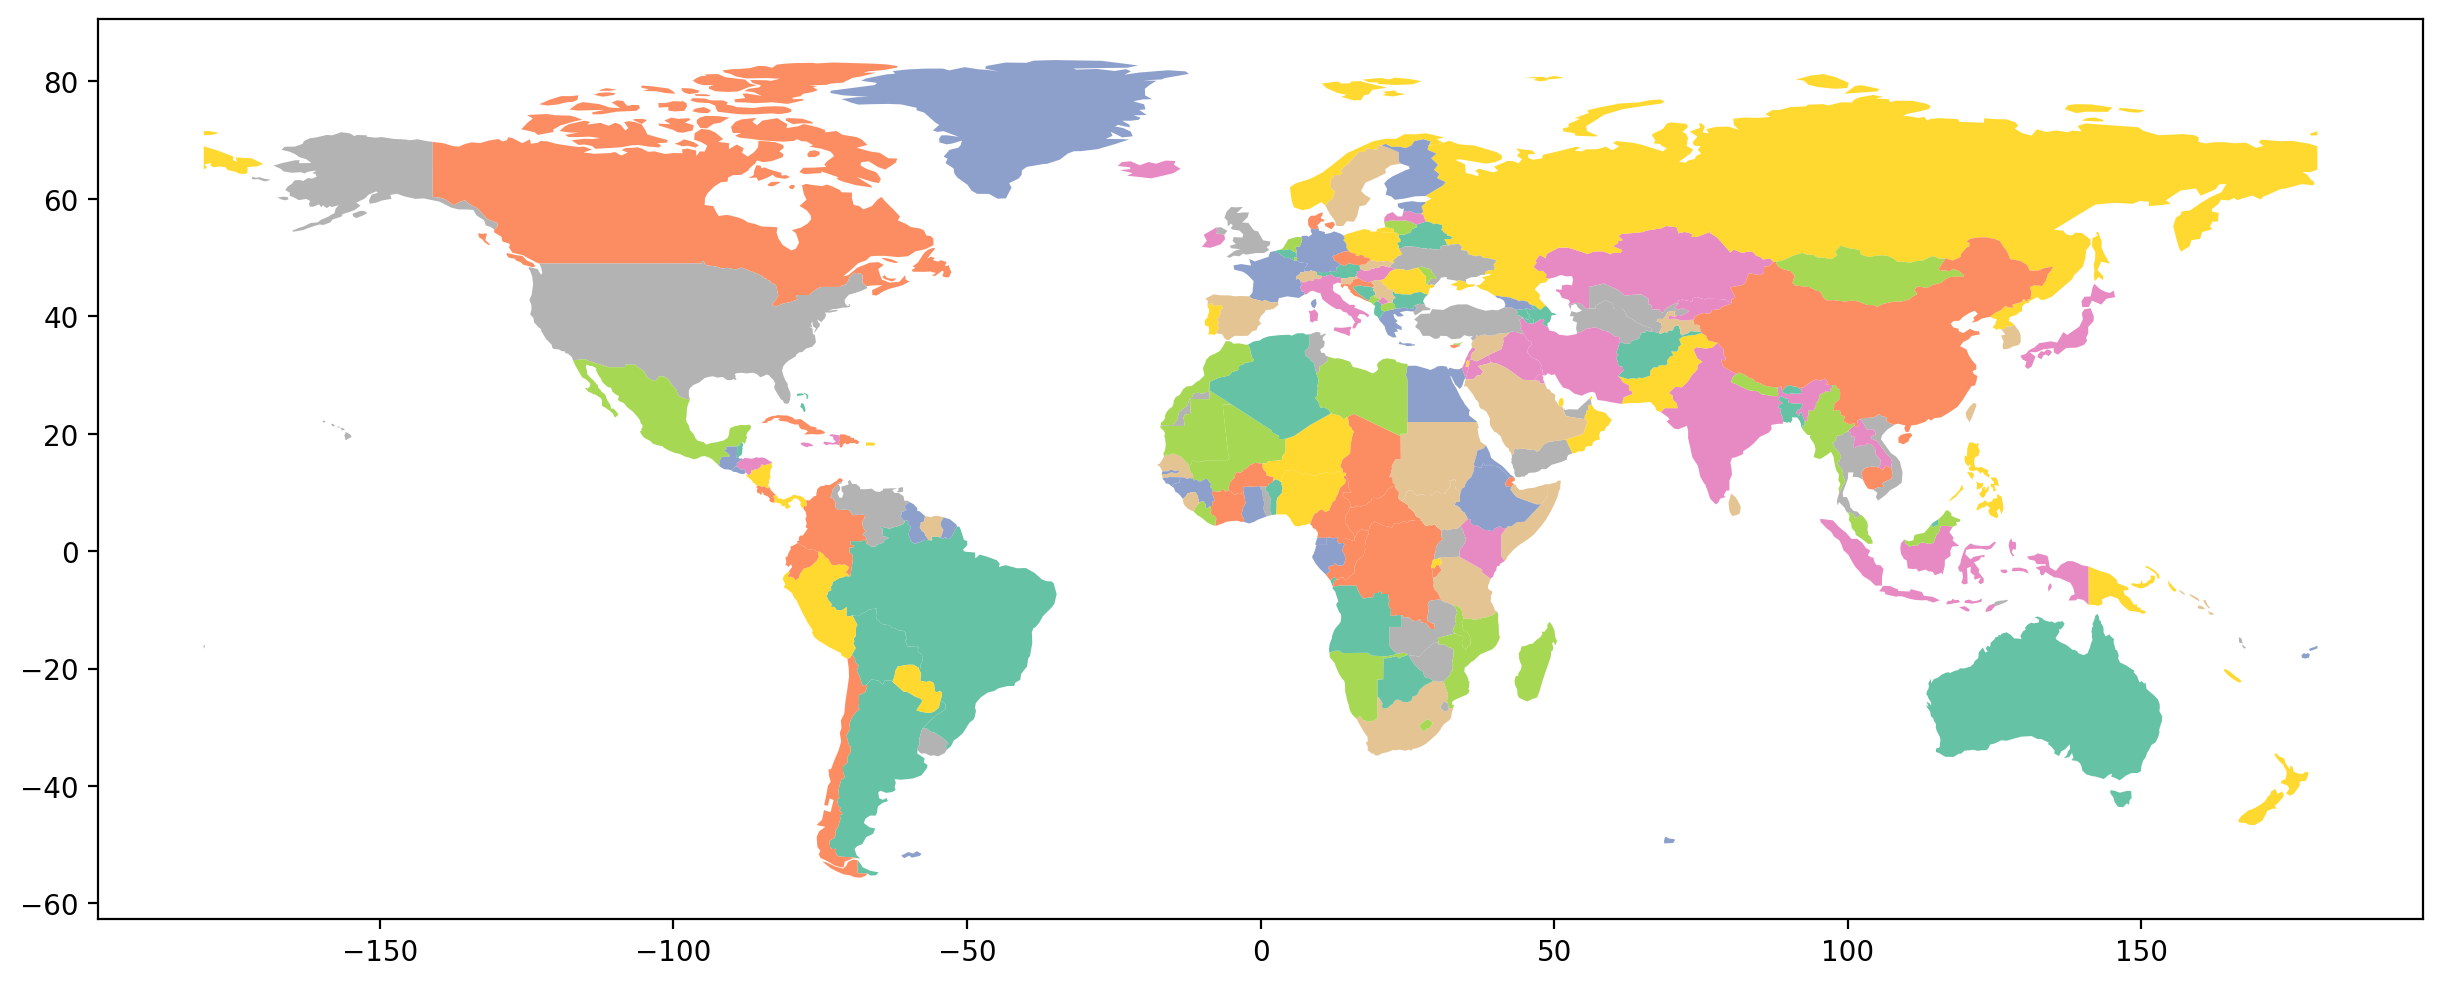

In [6]:
fig     = plt.figure(figsize=(15,10),dpi = 200)
ax      = plt.subplot(111)
worldMap.plot(column='name', ax=ax, legend=False,cmap='Set2',aspect=1,legend_kwds={'loc': 'lower left'})
# gpd_cable_gps.plot(column='cable_id',ax=ax, cmap='Set3')

In [7]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    first_cable = pd.read_sql('select landingPoint_country, cc."alpha-3" as alpha_3, min(cable_finish_year) as first_cable_year from landing_points lp left join world_countries wc on lp.landingPoint_country = wc.name left join country_code cc on wc.code = cc."alpha-2" where cc."alpha-3" is not null group by lp.landingPoint_country order by cable_finish_year desc;',con=con)
first_cable_merged = first_cable.merge(right=worldMap, how='right',left_on='alpha_3', right_on='iso_a3')
first_cable_merged

,landingPoint_country,alpha_3,first_cable_year,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Fiji,FJI,2000.0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,TZA,2009.0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,NaN,NaN,NaN,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,2001.0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States,USA,1992.0,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...
171,NaN,NaN,NaN,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
172,NaN,NaN,NaN,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
173,NaN,NaN,NaN,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
174,Trinidad and Tobago,TTO,1995.0,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

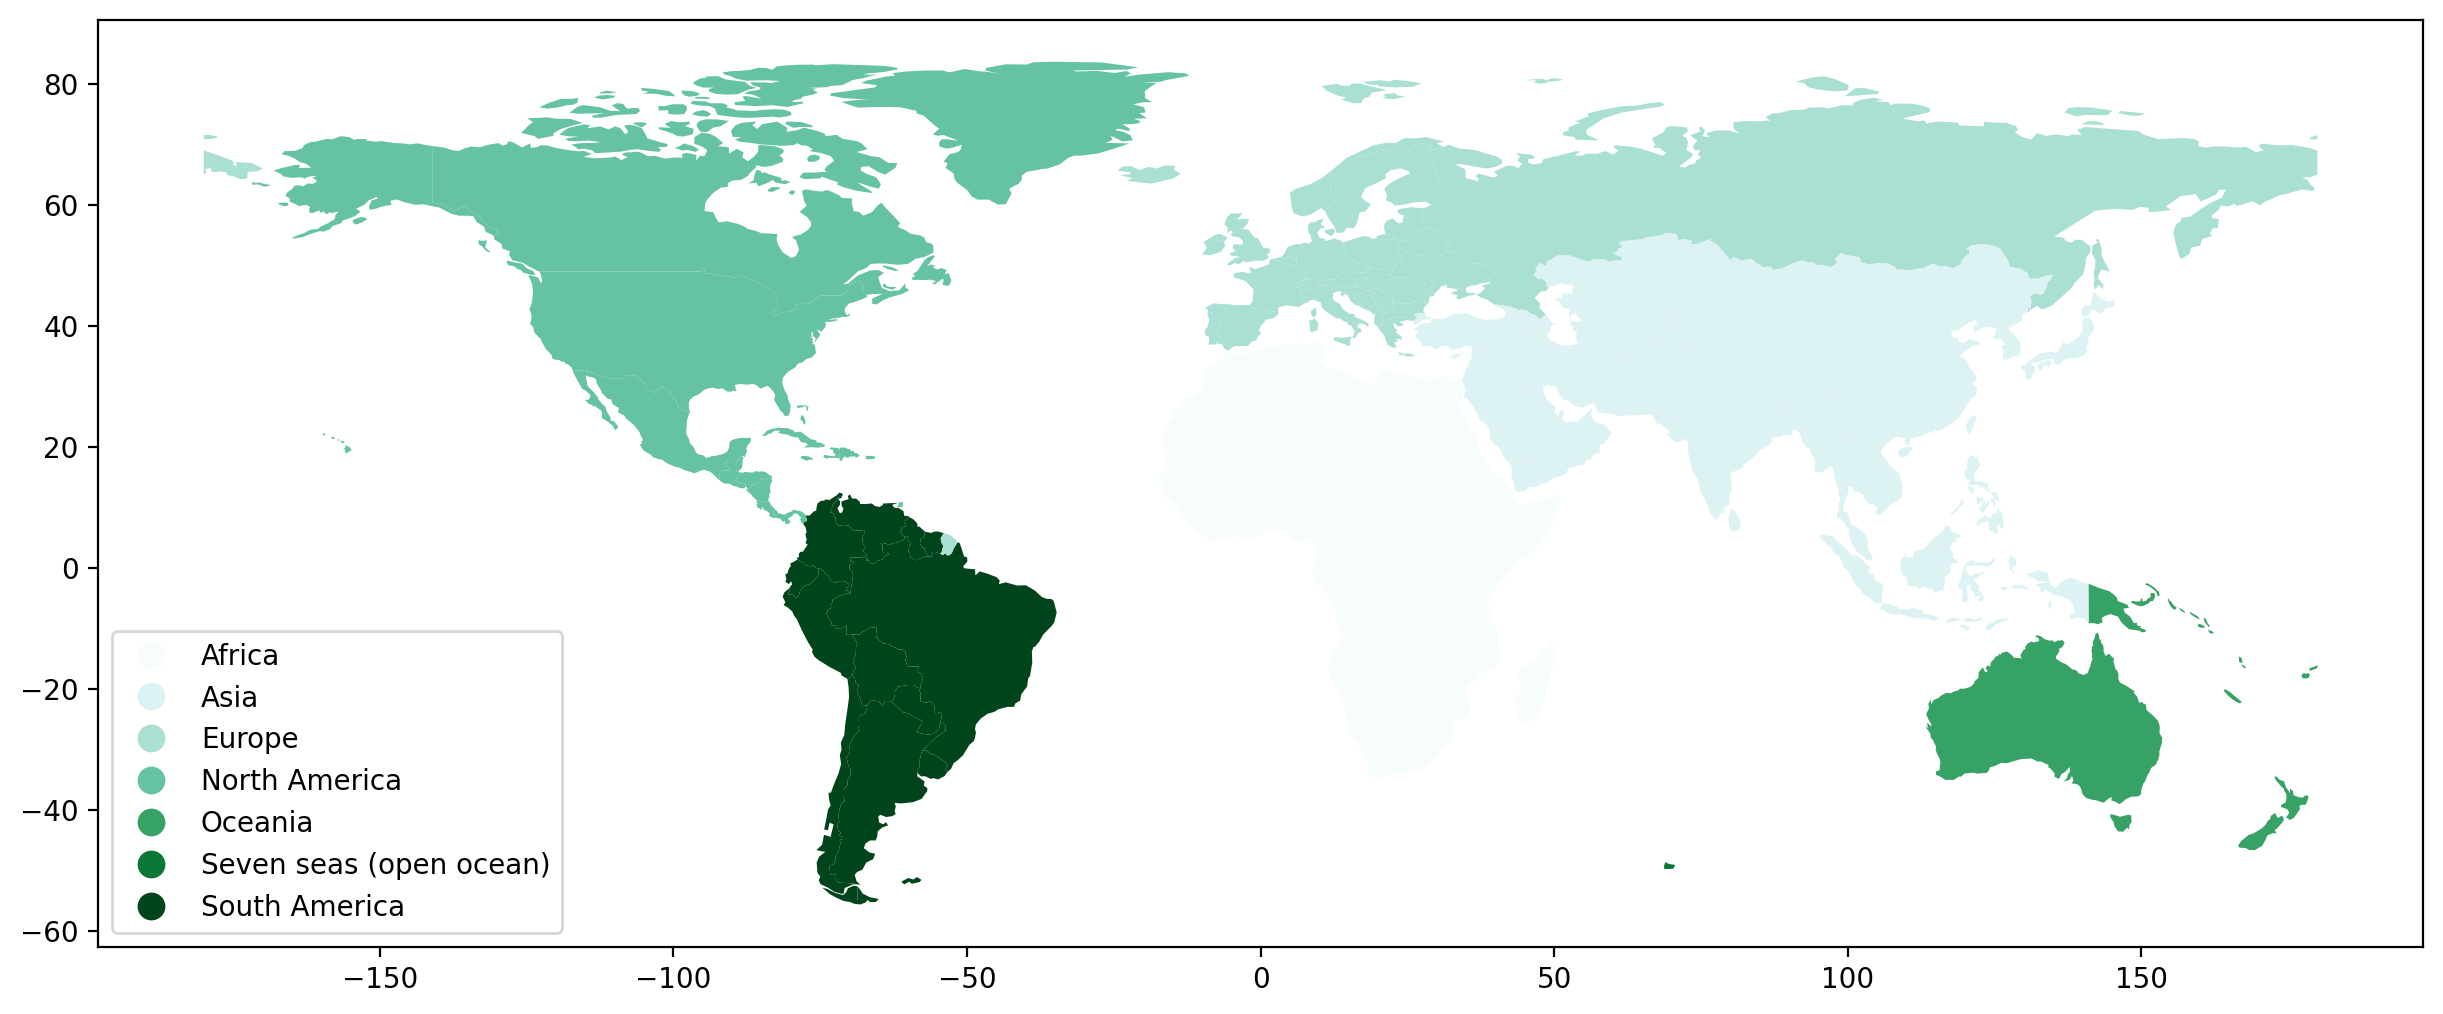

In [8]:
fig     = plt.figure(figsize=(15,10),dpi = 200)
ax      = plt.subplot(111)
# first_cable_merged.plot(column='continent', ax=ax, legend=True, cmap='Set2',aspect=1)
worldMap.plot(worldMap['continent'], cmap='BuGn', legend=True, ax=ax,legend_kwds={'loc': 'lower left'})
# legend_kwds={'bbox_to_anchor':(0.1, 0.5)}

<AxesSubplot:>

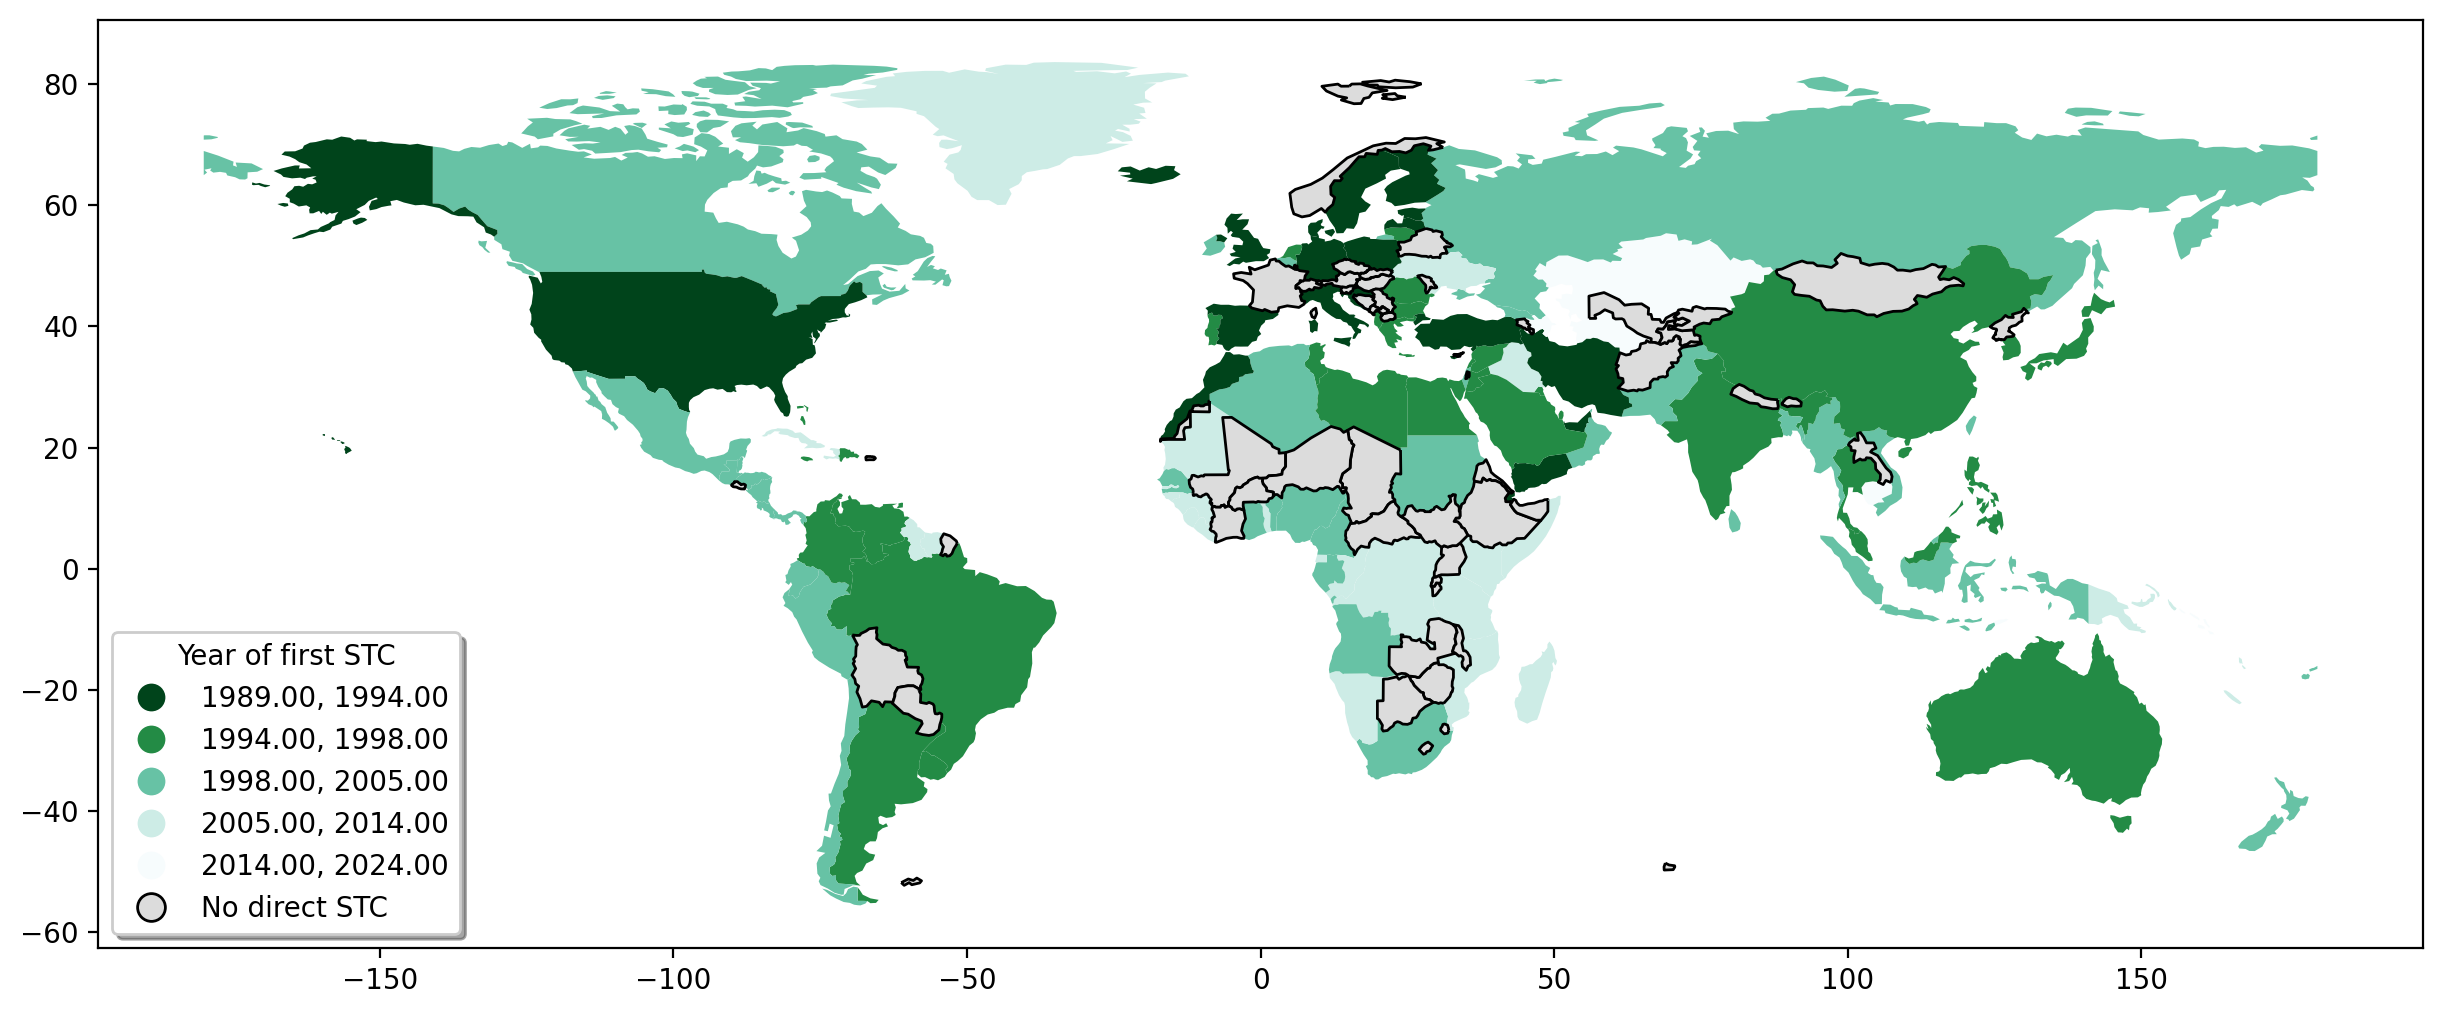

In [9]:
fig     = plt.figure(figsize=(15,10),dpi = 200)
ax      = plt.subplot(111)
gdf = gpd.GeoDataFrame(first_cable_merged, geometry='geometry')

orig_BuGn=plt.cm.get_cmap('BuGn')
reversed_BuGn = orig_BuGn.reversed()
gdf.plot(gdf['first_cable_year'],  cmap=reversed_BuGn, missing_kwds={
"color": "gainsboro",
"edgecolor": "black",
"hatch": "",
"label": "No direct STC"
},legend=True, ax=ax,scheme='NaturalBreaks',k=5,legend_kwds={'loc': 'lower left','title': 'Year of first STC','shadow': True})
# ax.legend(title="图例", loc='lower left', ncol=1, shadow=True)


In [10]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    landing_point_coor = pd.read_sql("select lp.cable_id, lp.cable_name, landingPoint_id, landingPoint_name, landingPoint_country as landingPoint_country_1, wc.continent as landingPoint_contient_1, cc.CapitalLongitude as lon1, cc.CapitalLatitude as lat1, merge_capacity, merge_length, merge_cost from landing_points lp left join cable_merge_length_capacity_cost cmlcc on lp.cable_id = cmlcc.cable_id left join world_countries wc on lp.landingPoint_country = wc.name left join country_capital cc on wc.code = cc.CountryCode where CapitalLongitude is not null",con=con)
landing_point_coor

,cable_id,cable_name,landingPoint_id,landingPoint_name,landingPoint_country_1,landingPoint_contient_1,lon1,lat1,merge_capacity,merge_length,merge_cost
0,colombian-festoon,Colombian Festoon,cartagena-colombia,"Cartagena, Colombia",Colombia,South America,-74.083333,4.600000,0.078618,400.0,42.780
1,colombian-festoon,Colombian Festoon,parque-isla-de-salamanca-colombia,"Parque Isla de Salamanca, Colombia",Colombia,South America,-74.083333,4.600000,0.078618,400.0,42.780
2,colombian-festoon,Colombian Festoon,puerto-colombia-colombia,"Puerto Colombia, Colombia",Colombia,South America,-74.083333,4.600000,0.078618,400.0,42.780
3,colombian-festoon,Colombian Festoon,santa-marta-colombia,"Santa Marta, Colombia",Colombia,South America,-74.083333,4.600000,0.078618,400.0,42.780
4,colombian-festoon,Colombian Festoon,tolu-colombia,"Tolu, Colombia",Colombia,South America,-74.083333,4.600000,0.078618,400.0,42.780
...,...,...,...,...,...,...,...,...,...,...,...
2213,strategic-evolution-underwater-link-seul,Strategic Evolution Underwater Link (SEUL),bomba-belize,"Bomba, Belize",Belize,North America,-88.766667,17.250000,24.950555,24.0,0.625
2214,strategic-evolution-underwater-link-seul,Strategic Evolution Underwater Link (SEUL),san-pedro-belize,"San Pedro, Belize",Belize,North America,-88.766667,17.250000,24.950555,24.0,0.625
2215,tannat,Tannat,las-toninas-argentina,"Las Toninas, Argentina",Argentina,South America,-58.666667,-34.583333,90.000000,2000.0,10.000
2216,tannat,Tannat,santos-brazil,"Santos, Brazil",Brazil,South America,-47.916667,-15.783333,90.000000,2000.0,10.000


In [11]:
def domestic_test(df):
    return df.drop_duplicates(subset='landingPoint_country_1')
temp = landing_point_coor.sort_values('lon1',ascending=True).groupby('cable_id',as_index=False).apply(domestic_test)
temp

cable_id              cable_name  \
0   406                  2africa                 2Africa   
    400                  2africa                 2Africa   
    413                  2africa                 2Africa   
    386                  2africa                 2Africa   
    418                  2africa                 2Africa   
...                          ...                     ...   
498 834   x-link-submarine-cable  X-Link Submarine Cable   
499 1116                  yellow                  Yellow   
    1115                  yellow                  Yellow   
500 1522                    zeus                    Zeus   
    1521                    zeus                    Zeus   

                            landingPoint_id  \
0   406                       dakar-senegal   
    400                 carcavelos-portugal   
    413   gran-canaria-canary-islands-spain   
    386                         accra-ghana   
    418                 bude-united-kingdom   
...                                     ...   
498 834                   georgetown-guyana   
499 1116          bellport-ny-united-states   
    1115                bude-united-kingdom   
500 1522           lowestoft-united-kingdom   
    1521              zandvoort-netherlands   

                            landingPoint_name landingPoint_country_1  \
0   406                        Dakar, Senegal                Senegal   
    400                  Carcavelos, Portugal               Portugal   
    413   Gran Canaria, Canary Islands, Spain                  Spain   
    386                          Accra, Ghana                  Ghana   
    418                  Bude, United Kingdom         United Kingdom   
...                                       ...                    ...   
498 834                    Georgetown, Guyana                 Guyana   
499 1116          Bellport, NY, United States          United States   
    1115                 Bude, United Kingdom         United Kingdom   
500 1522            Lowestoft, United Kingdom         United Kingdom   
    1521               Zandvoort, Netherlands            Netherlands   

         landingPoint_contient_1       lon1       lat1  merge_capacity  \
0   406                   Africa -17.633333  14.733333      140.458488   
    400                   Europe  -9.133333  38.716667      140.458488   
    413                   Europe  -3.683333  40.400000      140.458488   
    386                   Africa  -0.216667   5.550000      140.458488   
    418                   Europe  -0.083333  51.500000      140.458488   
...                          ...        ...        ...             ...   
498 834            South America -58.150000   6.800000       44.384991   
499 1116           North America -77.000000  38.883333        0.186533   
    1115                  Europe  -0.083333  51.500000        0.186533   
500 1522                  Europe  -0.083333  51.500000     4000.000000   
    1521                  Europe   4.916667  52.350000     4000.000000   

          merge_length  merge_cost  
0   406   45000.000000     925.000  
    400   45000.000000     925.000  
    413   45000.000000     925.000  
    386   45000.000000     925.000  
    418   45000.000000     925.000  
...                ...         ...  
498 834     775.000000      19.375  
499 1116   7001.000000     207.810  
    1115   7001.000000     207.810  
500 1522    341.810776      41.330  
    1521    341.810776      41.330  

[1292 rows x 11 columns]

In [12]:
def shift_lonlat(df):
    df['lon2'] = df['lon1'].shift()
    df['lat2'] = df['lat1'].shift()
    df['landingPoint_country_2'] = df['landingPoint_country_1'].shift()
    df['landingPoint_contient_2'] = df['landingPoint_contient_1'].shift()
    return df

In [13]:

country_cable = pd.DataFrame()
for x in list(temp.groupby('cable_id')):
    if x[1].shape[0]!=1: # international cable
        country_cable = country_cable.append(shift_lonlat(x[1]),ignore_index=True)
    # else:
    #     # domestic cable
    #     print()

# list(temp.groupby('cable_id'))[0][1]


In [14]:
dest = {}
country_cable = country_cable.dropna()
# for row in country_cable.shape[0]:
#     if (country_cable.iloc[row, 'landingPoint_country_1']):
#         print(1)
#         if ()
#     elif (country_cable.iloc[row, 'landingPoint_country_2'] in dest):
#         print(2)
#     else:
#         dest = dest.append({'country_1': country_cable.iloc[row,'landingPoint_country_1'], 'country_2': country_cable.iloc[row,'landingPoint_country_2'], 'lon1': country_cable.iloc[row,'lon1'], 'lat1': country_cable.iloc[row,'lat1'], 'lon2': country_cable.iloc[row,'lon2'], 'lat2': country_cable.iloc[row,'lat2'],  'merge_cost': country_cable.iloc[row,'merge_cost'], 'merge_capacity': country_cable.iloc[row,'merge_capacity'], 'merge_length': country_cable.iloc[row,'merge_length'],},ignore_index=True)
country_cable.to_csv('/Users/dijiongyuequ/Downloads/country_length_capacity_cost.csv')

In [15]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    country_length_capcity_cost = pd.read_sql("select landingPoint_country_1, landingPoint_contient_1, lon1, lat1, landingPoint_country_2, landingPoint_contient_2, lon2, lat2, count(*)            as number_of_line, sum(merge_capacity) as total_capacity, avg(merge_length)   as avg_length, avg(merge_cost)     as avg_cost from country_length_capacity_cost group by landingPoint_country_1, landingPoint_country_2",con=con)
country_length_capcity_cost


,landingPoint_country_1,landingPoint_contient_1,lon1,lat1,landingPoint_country_2,landingPoint_contient_2,lon2,lat2,number_of_line,total_capacity,avg_length,avg_cost
0,Albania,Europe,19.816667,41.316667,Croatia,Europe,16.000000,45.800000,1,0.000622,440.00,13.40000
1,Albania,Europe,19.816667,41.316667,Italy,Europe,12.483333,41.900000,1,0.002500,240.00,10.00000
2,Algeria,Africa,3.050000,36.750000,France,Europe,2.333333,48.866667,4,510.807308,8423.50,291.40750
3,Algeria,Africa,3.050000,36.750000,Spain,Europe,-3.683333,40.400000,2,40.160000,541.00,22.30000
4,American Samoa,Oceania,-170.700000,-14.266667,Samoa,Oceania,-171.766667,-13.816667,1,2.491475,250.00,6.25000
...,...,...,...,...,...,...,...,...,...,...,...,...
391,Virgin Islands (U.K.),North America,-64.616667,18.416667,Dominican Republic,North America,-69.900000,18.466667,1,2.500000,1750.00,35.00000
392,Virgin Islands (U.S.),North America,-64.933333,18.350000,Dominican Republic,North America,-69.900000,18.466667,1,140.458488,670.00,16.75000
393,Virgin Islands (U.S.),North America,-64.933333,18.350000,United States,North America,-77.000000,38.883333,1,0.078618,183.00,4.57500
394,Yemen,Asia,44.200000,15.350000,Djibouti,Africa,43.150000,11.583333,4,290.740053,13817.25,397.37625


In [16]:
gdf = gpd.GeoDataFrame(country_length_capcity_cost)
gdf['fr_point'] = gpd.points_from_xy(x=gdf['lon1'],y=gdf['lat1'])
gdf['to_point'] = gpd.points_from_xy(x=gdf['lon2'],y=gdf['lat2'])
gdf['fr_id'] = round((round(gdf['lon1'],5) + round(gdf['lat1'],5))*100000,0)
gdf['to_id'] = round((round(gdf['lon2'],5) + round(gdf['lat2'],5))*100000,0)

# gdf['distance_from_previous'] = gdf['fr_point'].distance(gdf['to_point'])
# gdf['total_distance'] = gdf.groupby('cable_id')['distance_from_previous'].transform('sum')
# gdf['length_from_previous'] = gdf['cable_length'] / gdf['total_distance'] * gdf['distance_from_previous']
# gdf['segment_cost'] = gdf['cable_cost']/gdf['cable_length'] * gdf['length_from_previous']

gdf['inverse_length'] = 1/gdf['avg_length']
gdf['line'] = gdf.apply(lambda row: LineString([row['fr_point'], row['to_point']]), axis=1) #Create a linestring column

gdf.drop(['fr_point','to_point'], axis=1, inplace=True)

gdf

,landingPoint_country_1,landingPoint_contient_1,lon1,lat1,landingPoint_country_2,landingPoint_contient_2,lon2,lat2,number_of_line,total_capacity,avg_length,avg_cost,fr_id,to_id,inverse_length,line
0,Albania,Europe,19.816667,41.316667,Croatia,Europe,16.000000,45.800000,1,0.000622,440.00,13.40000,6113334.0,6180000.0,0.002273,"LINESTRING (19.816667 41.31666666666667, 16 45.8)"
1,Albania,Europe,19.816667,41.316667,Italy,Europe,12.483333,41.900000,1,0.002500,240.00,10.00000,6113334.0,5438333.0,0.004167,"LINESTRING (19.816667 41.31666666666667, 12.48..."
2,Algeria,Africa,3.050000,36.750000,France,Europe,2.333333,48.866667,4,510.807308,8423.50,291.40750,3980000.0,5120000.0,0.000119,"LINESTRING (3.05 36.75, 2.333333 48.8666666666..."
3,Algeria,Africa,3.050000,36.750000,Spain,Europe,-3.683333,40.400000,2,40.160000,541.00,22.30000,3980000.0,3671667.0,0.001848,"LINESTRING (3.05 36.75, -3.683333 40.4)"
4,American Samoa,Oceania,-170.700000,-14.266667,Samoa,Oceania,-171.766667,-13.816667,1,2.491475,250.00,6.25000,-18496667.0,-18558334.0,0.004000,"LINESTRING (-170.7 -14.266666666666667, -171.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Virgin Islands (U.K.),North America,-64.616667,18.416667,Dominican Republic,North America,-69.900000,18.466667,1,2.500000,1750.00,35.00000,-4620000.0,-5143333.0,0.000571,"LINESTRING (-64.616667 18.416666666666668, -69..."
392,Virgin Islands (U.S.),North America,-64.933333,18.350000,Dominican Republic,North America,-69.900000,18.466667,1,140.458488,670.00,16.75000,-4658333.0,-5143333.0,0.001493,"LINESTRING (-64.933333 18.35, -69.9 18.4666666..."
393,Virgin Islands (U.S.),North America,-64.933333,18.350000,United States,North America,-77.000000,38.883333,1,0.078618,183.00,4.57500,-4658333.0,-3811667.0,0.005464,"LINESTRING (-64.933333 18.35, -77 38.883333)"
394,Yemen,Asia,44.200000,15.350000,Djibouti,Africa,43.150000,11.583333,4,290.740053,13817.25,397.37625,5955000.0,5473333.0,0.000072,"LINESTRING (44.2 15.35, 43.15 11.583333333333334)"


<AxesSubplot:>

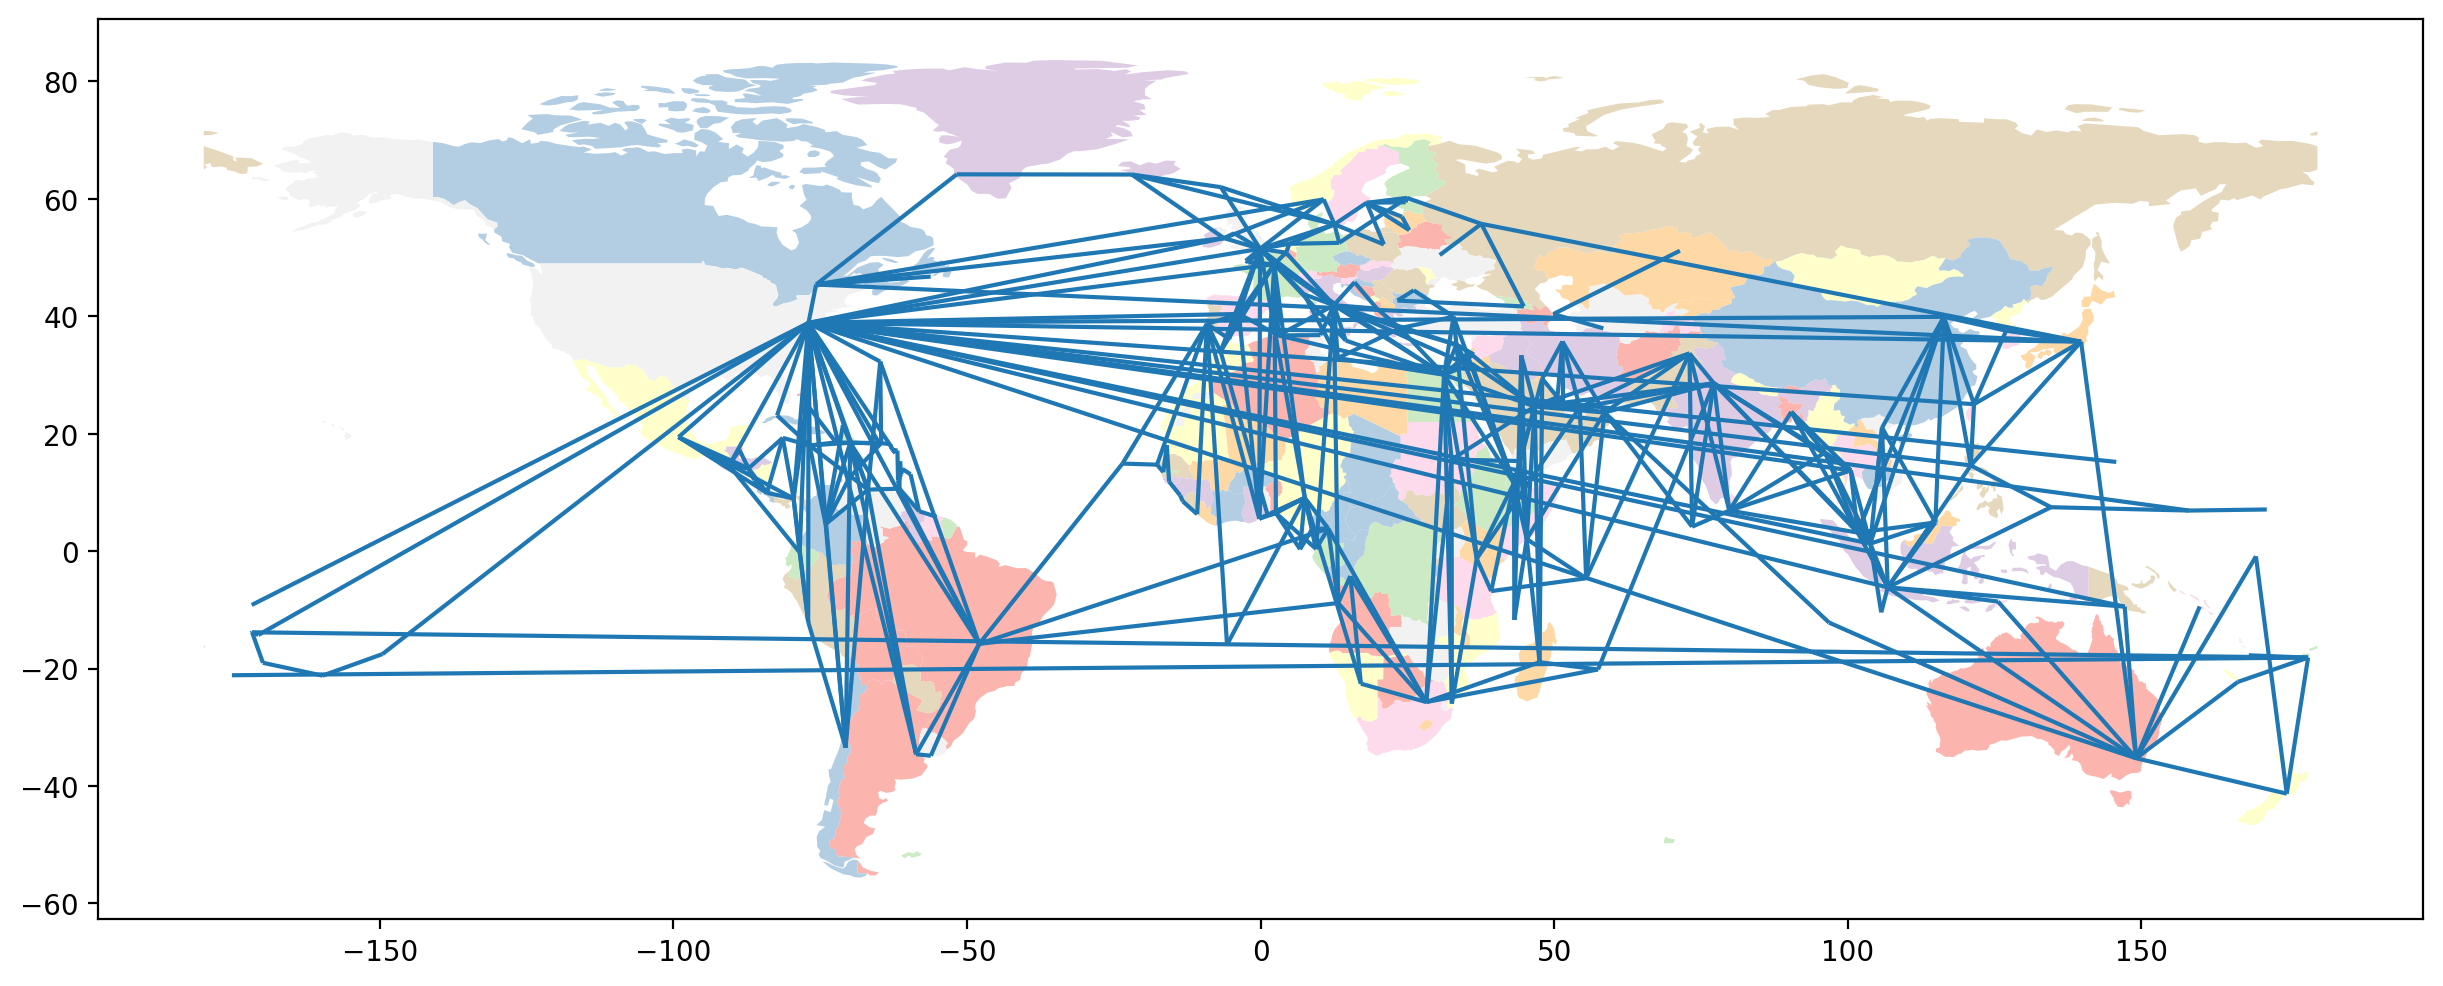

In [17]:
fig     = plt.figure(figsize=(15,10),dpi = 200)
ax      = plt.subplot(111)
gdf = gpd.GeoDataFrame(gdf, geometry=gdf['line'])
worldMap.plot(column = 'name', ax=ax, cmap = 'Pastel1')
gdf.plot(legend=True,legend_kwds={'label': "Travel time (min)"},ax=ax)

# leg1 = ax.legend(loc='upper right')
# ax.add_artist(leg1)


/opt/homebrew/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

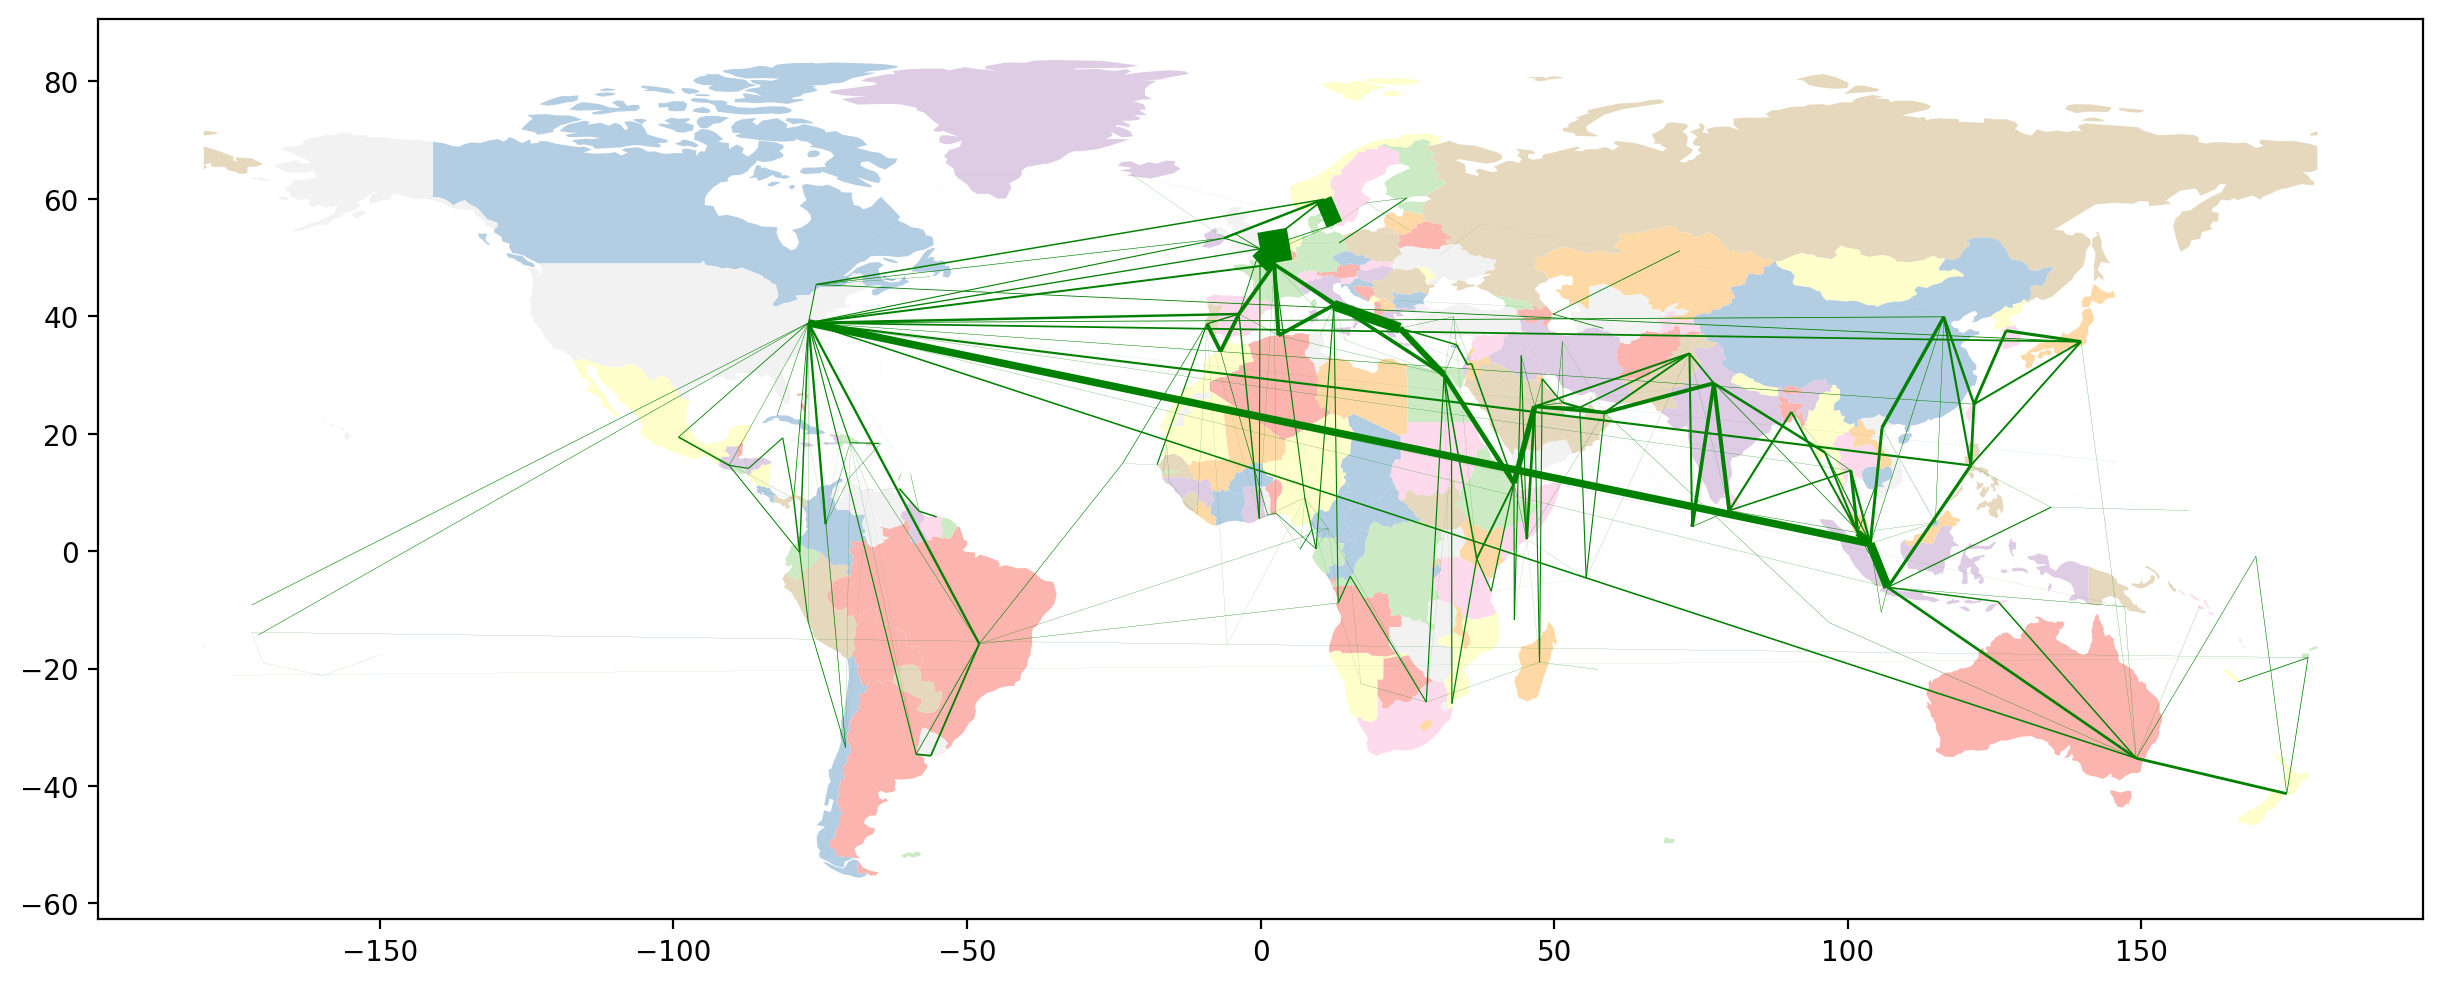

In [18]:
fig     = plt.figure(figsize=(15,10),dpi = 200)
ax      = plt.subplot(111)
worldMap.plot(column = 'name', ax=ax, cmap = 'Pastel1')
gdf.plot(column=gdf['total_capacity'],linewidth= gdf['total_capacity']/350, color = 'g',ax=ax)


# cmap='BuGn',)

findfont: Font family ['small'] not found. Falling back to DejaVu Sans.


Text(0.5, 1.0, 'High level data description')

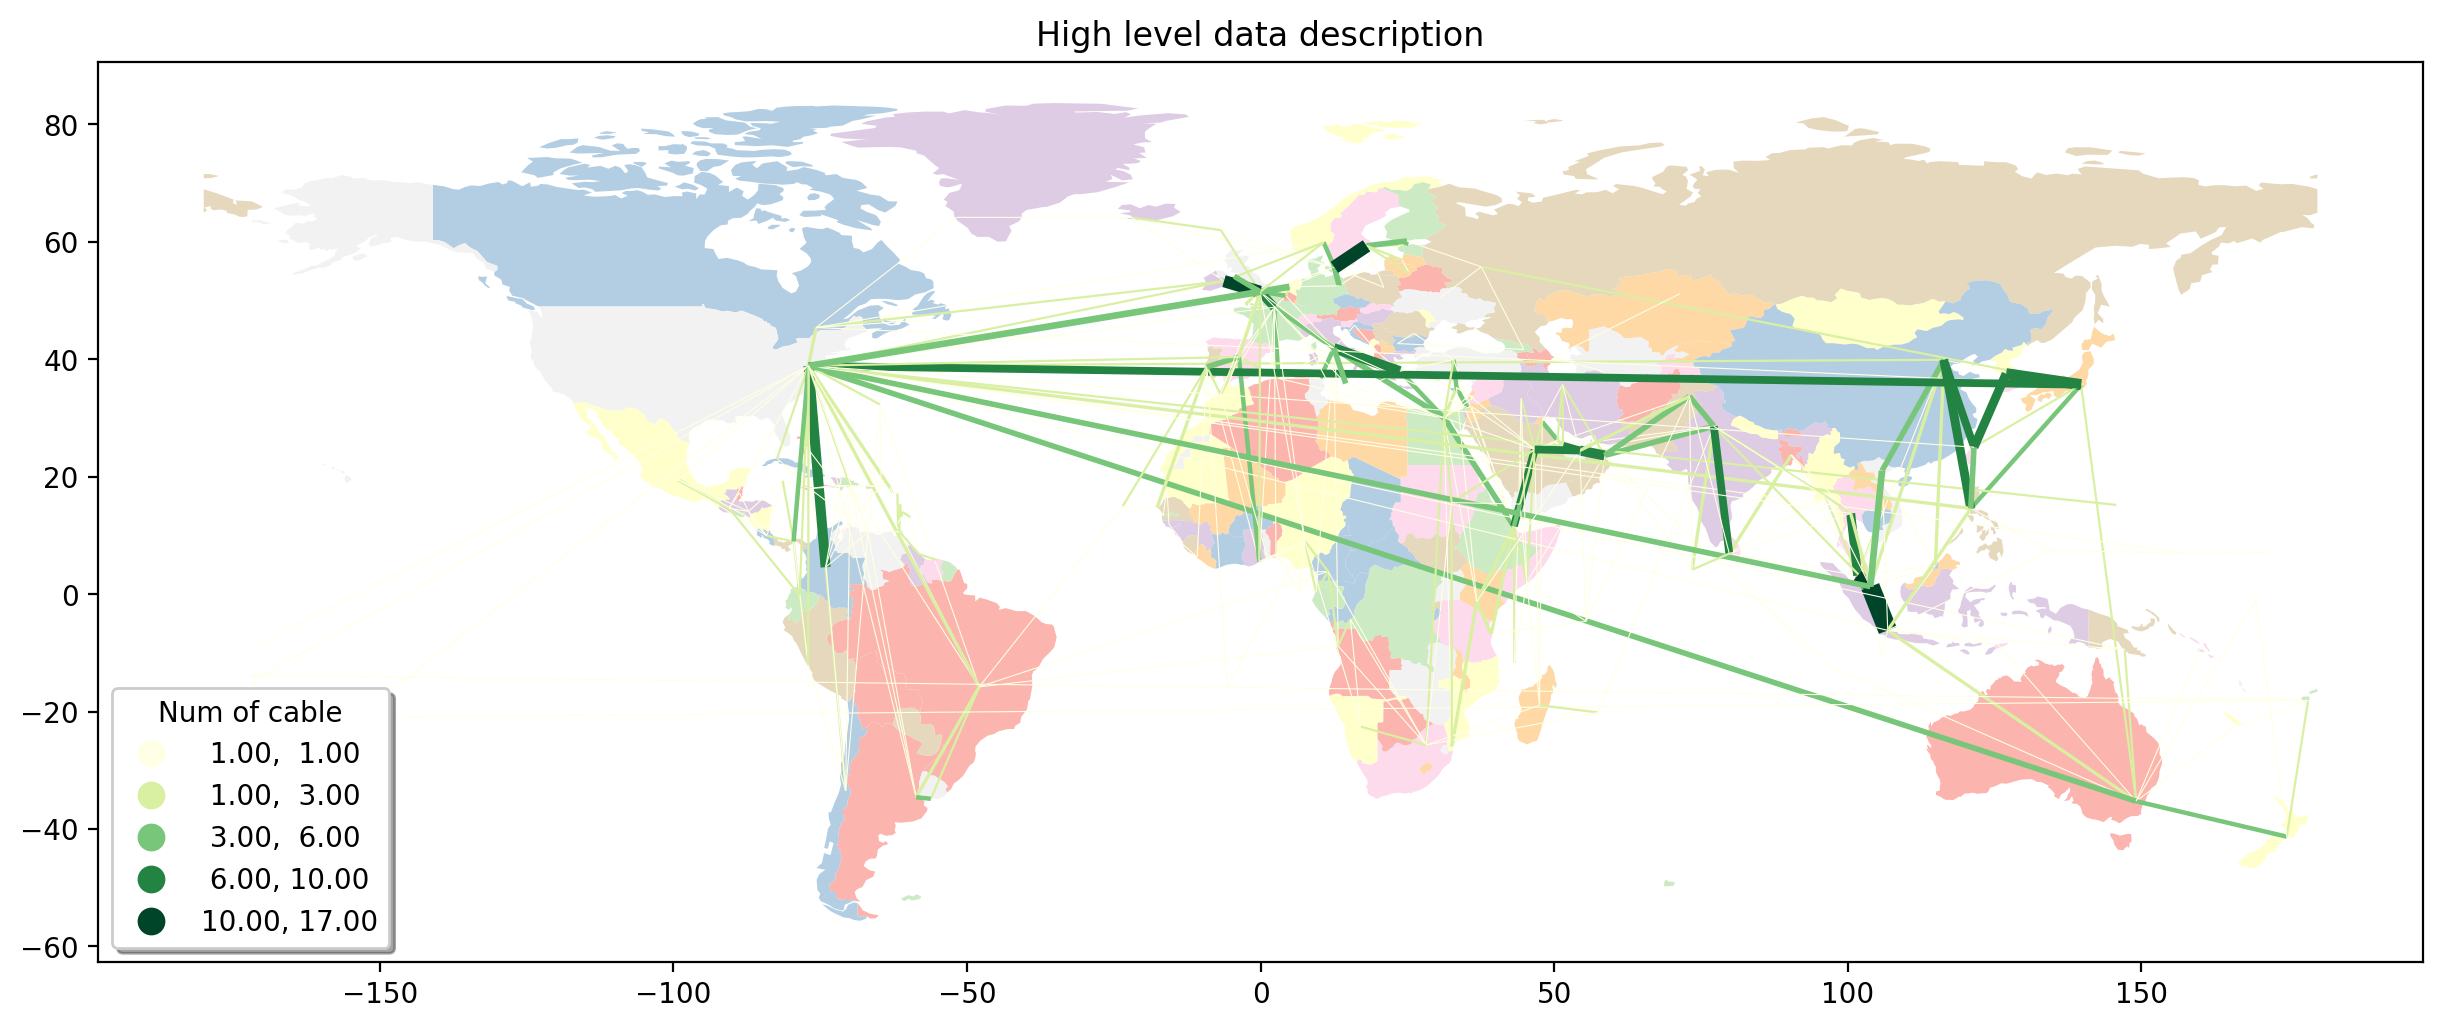

In [19]:
fig     = plt.figure(figsize=(15,10),dpi = 200)
ax      = plt.subplot(111)
worldMap.plot(column = 'name', ax=ax, cmap = 'Pastel1')
# gdf.plot(column='number_of_line', ax=ax,legend=True, aspect=1,linewidth= gdf['number_of_line']/2.5, color = 'g')
gdf.plot(column='number_of_line', ax=ax,legend=True, aspect=1,linewidth= gdf['number_of_line']/2.5, cmap = 'YlGn',scheme='NaturalBreaks',k=5,legend_kwds={ 'loc': 'lower left', 'title': 'Num of cable','prop':'small', 'shadow': True})
# red_patch = mpatches.Patch(color='g', label='Country wide connection')
# ax.legend(handles=[red_patch])
plt.title("High level data description")
# worldMap.plot(column='continent', ax=ax, legend=True,cmap='Set2',aspect=1,legend_kwds={'loc': 'lower left'})

# cmap='BuGn',)

In [20]:
gdf.sort_values('number_of_line',ascending=False).head(10)[['landingPoint_country_1','landingPoint_contient_1','landingPoint_country_2','landingPoint_contient_2','number_of_line']]

,landingPoint_country_1,landingPoint_contient_1,landingPoint_country_2,landingPoint_contient_2,number_of_line
158,Indonesia,Asia,Singapore,Asia,17
333,Sweden,Europe,Denmark,Europe,12
307,Singapore,Asia,Malaysia,Asia,11
365,United Kingdom,Europe,Ireland,Europe,11
184,Japan,Asia,South Korea,Asia,10
64,Colombia,South America,United States,North America,9
135,Greece,Europe,Italy,Europe,9
255,Oman,Asia,United Arab Emirates,Asia,9
120,France,Europe,United Kingdom,Europe,8
269,Philippines,Asia,China,Asia,8


In [21]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   landingPoint_country_1   396 non-null    object  
 1   landingPoint_contient_1  396 non-null    object  
 2   lon1                     396 non-null    float64 
 3   lat1                     396 non-null    float64 
 4   landingPoint_country_2   396 non-null    object  
 5   landingPoint_contient_2  396 non-null    object  
 6   lon2                     396 non-null    float64 
 7   lat2                     396 non-null    float64 
 8   number_of_line           396 non-null    int64   
 9   total_capacity           396 non-null    float64 
 10  avg_length               396 non-null    float64 
 11  avg_cost                 396 non-null    float64 
 12  fr_id                    396 non-null    float64 
 13  to_id                    396 non-null    float64 
 14  in

In [22]:
len((set (gdf['landingPoint_country_1'].unique())).union(set (gdf['landingPoint_country_2'].unique())))

173

In [23]:
worldMap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

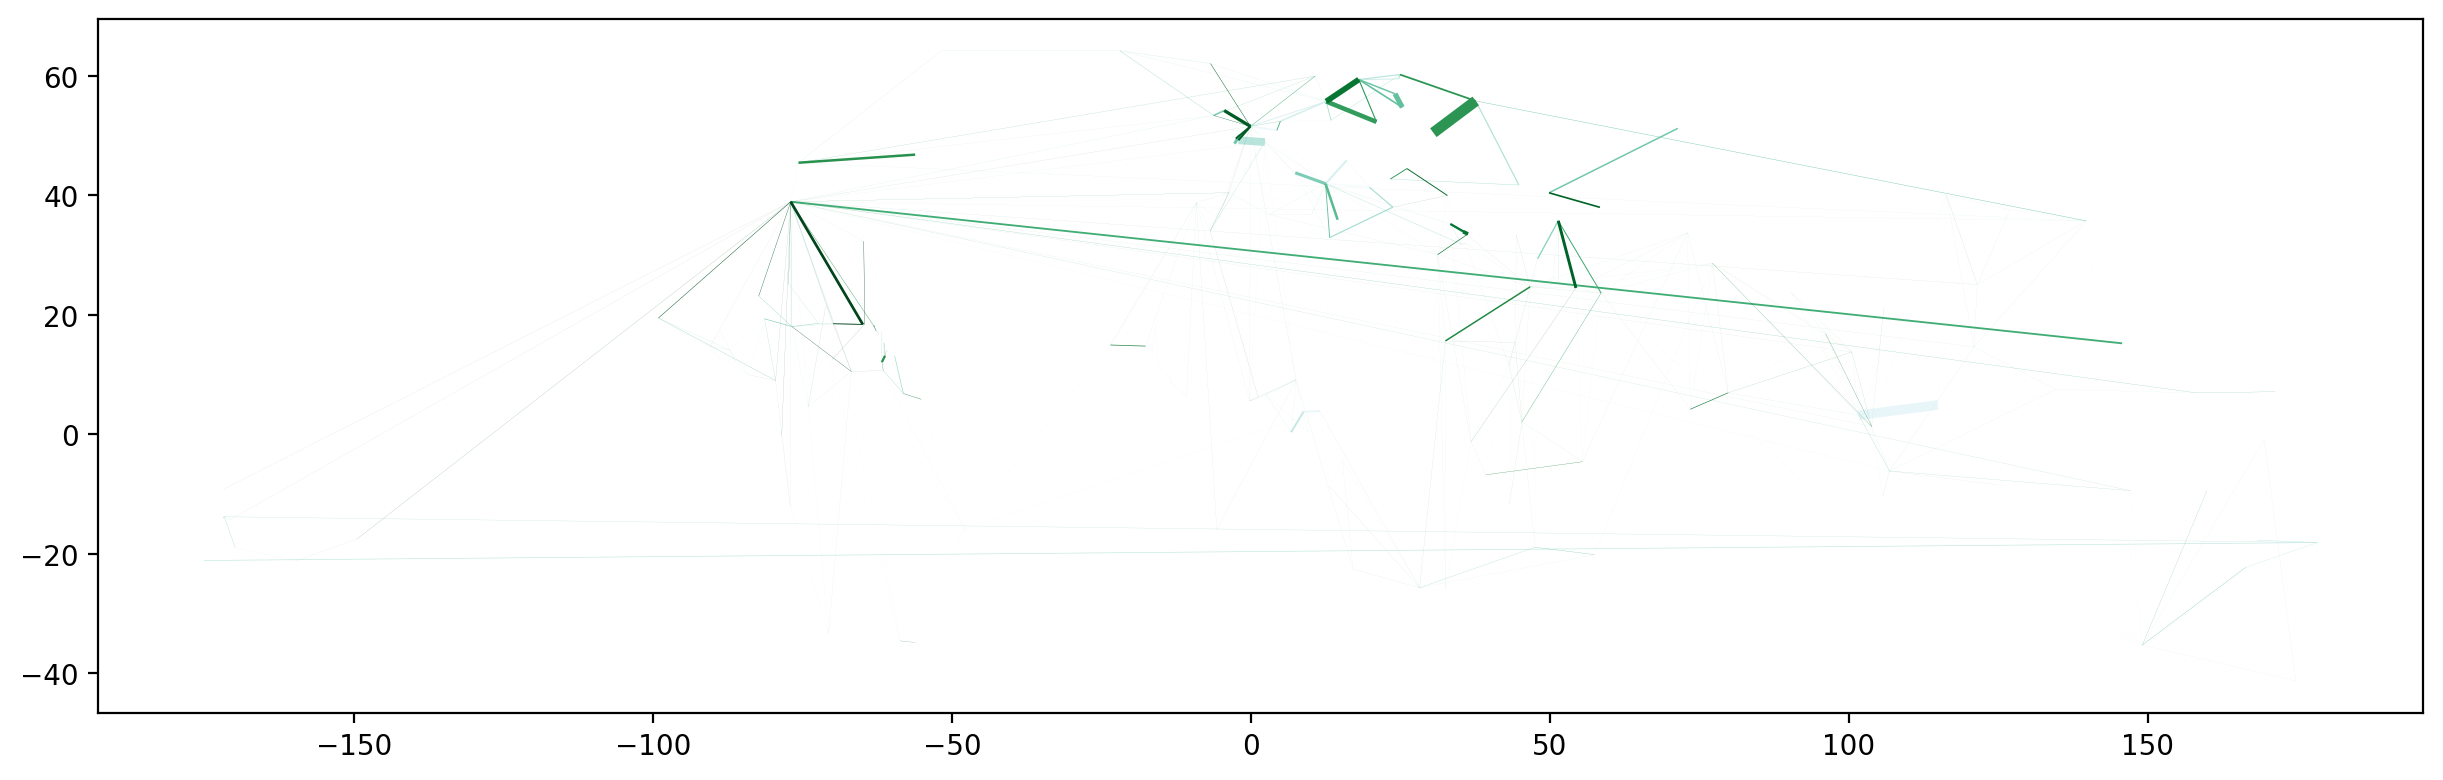

In [24]:
fig     = plt.figure(figsize=(15,10),dpi = 200)
ax      = plt.subplot(111)
gdf = gpd.GeoDataFrame(gdf, geometry=gdf['line'])
gdf.plot(ax=ax, linewidth= gdf['inverse_length']*180,cmap='BuGn')

<AxesSubplot:>

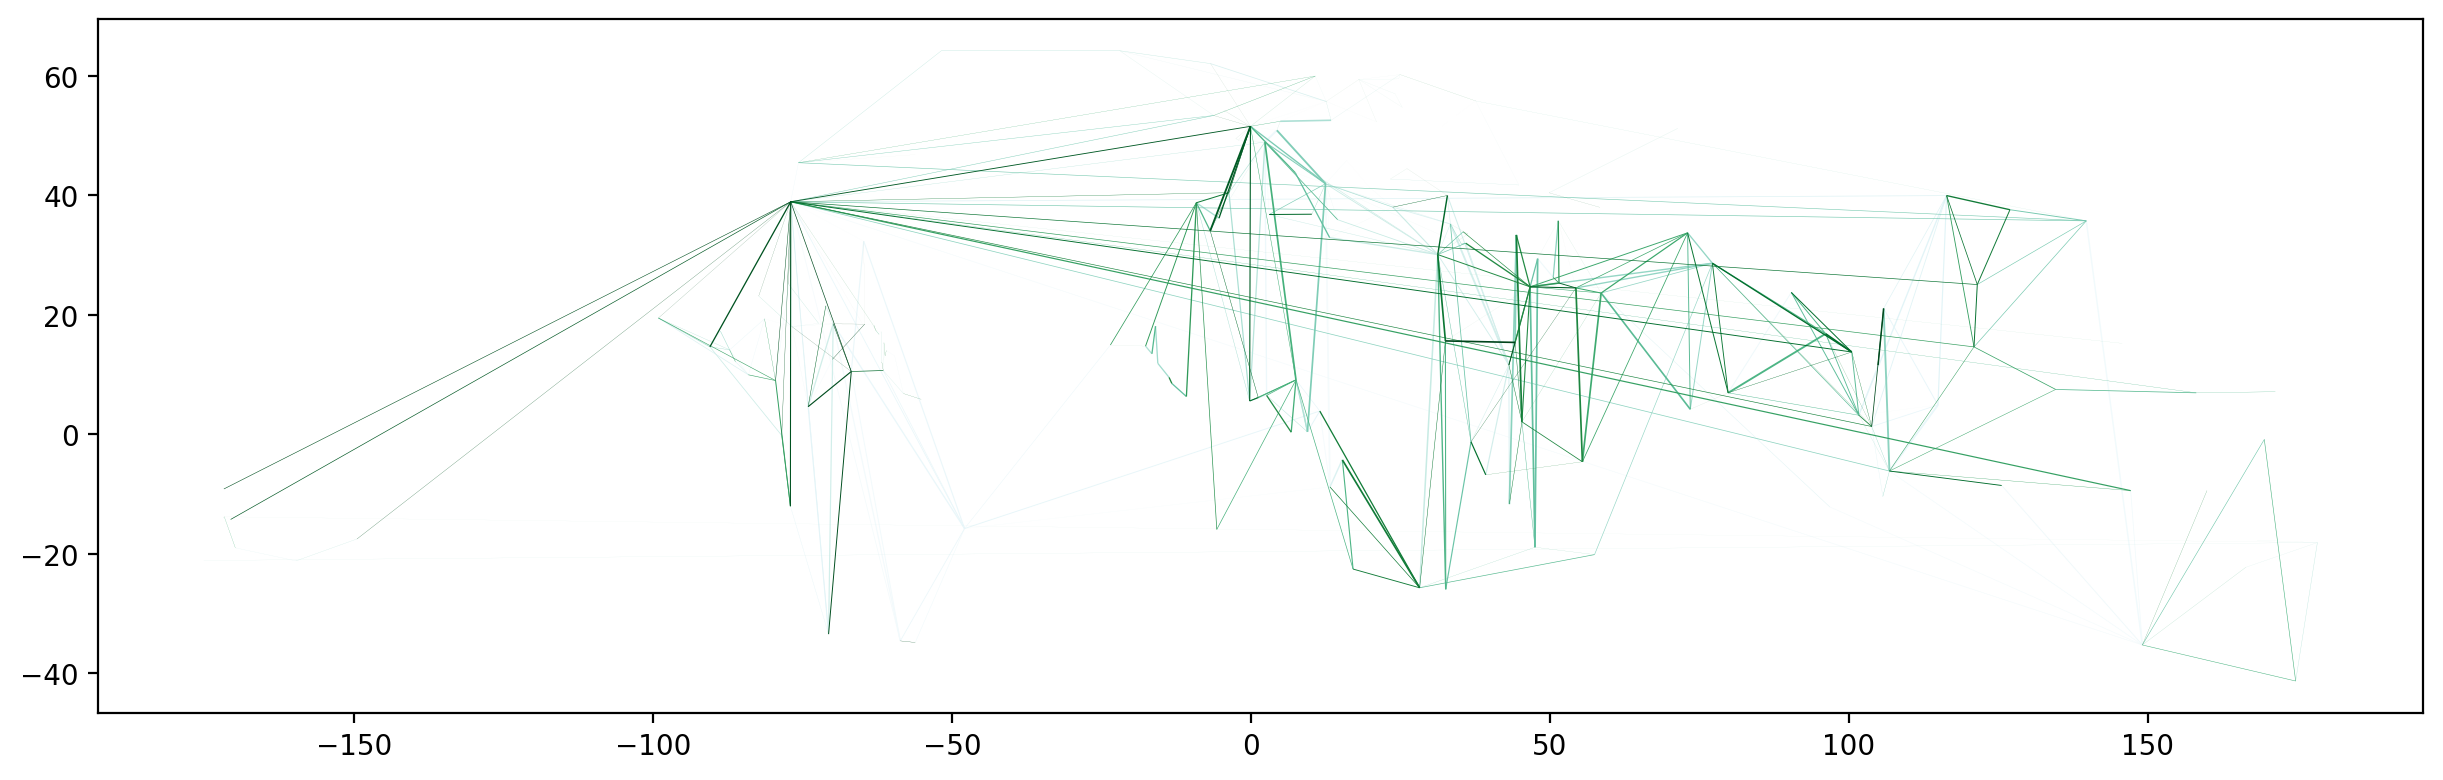

In [25]:
fig     = plt.figure(figsize=(15,10),dpi = 200)
ax      = plt.subplot(111)
gdf = gpd.GeoDataFrame(gdf, geometry=gdf['line'])
gdf.plot(ax=ax, linewidth= gdf['avg_cost']/1500,cmap='BuGn',)